## EN2550 Assignment 1 on Intensity Transformations and Neighborhood Filtering

190574U </br> Induwara Senadheera

256


Text(0.5, 1.0, 'Tranformed Image')

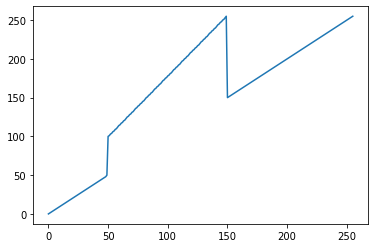

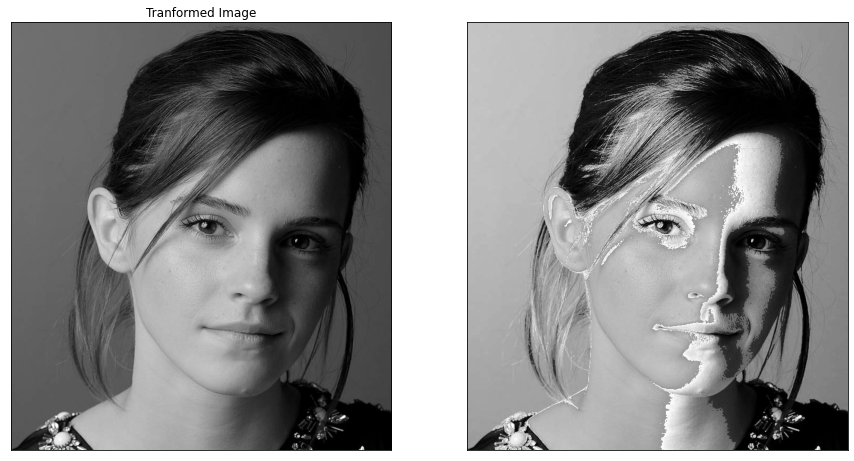

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert cv is not None

t1=np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)

t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
print(len(t))
fig,ax=plt.subplots()
assert len(t) ==256
ax.plot(t)
g=cv.LUT(im,t)#look up table
#g=t[cv]

fig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[0].imshow(im,"gray")
ax[0].set_title('Original')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[1].imshow(g,"gray")
ax[0].set_title('Tranformed Image')






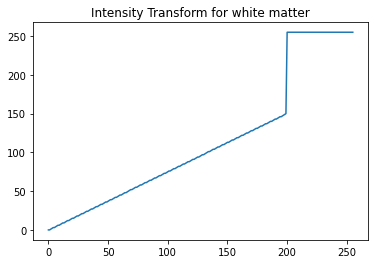

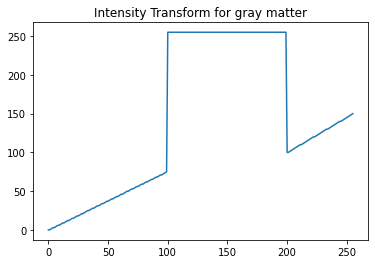

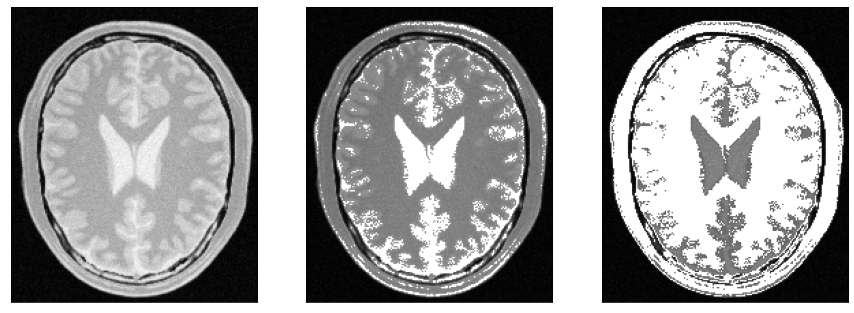

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert cv is not None

t1=np.linspace(0,150,200)
t2=np.linspace(255,255,56)

t=np.concatenate((t1,t2),axis=0).astype(np.uint8)

fig,ax=plt.subplots()
assert len(t) ==256
ax.plot(t)
ax.set_title('Intensity Transform for white matter')
white=cv.LUT(im,t)


t1=np.linspace(0,75,100)
t2=np.linspace(255,255,100)
t3=np.linspace(100,150,56)

t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
assert len(t) ==256
ax.plot(t)
ax.set_title('Intensity Transform for gray matter')
graym=cv.LUT(im,t)

fig,ax=plt.subplots(1,3,figsize=(15,11))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[0].imshow(im,"gray")
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[1].imshow(white,"gray")
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[2].imshow(graym,"gray")

([], [])

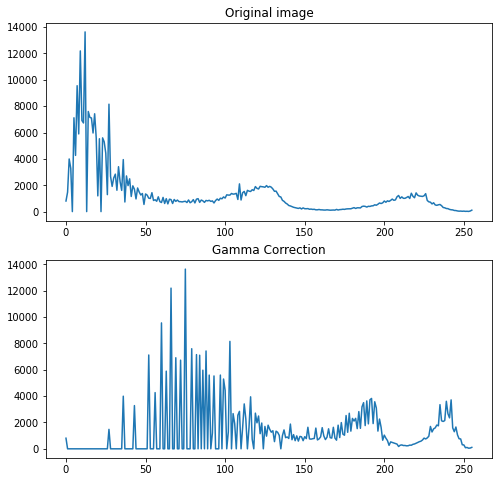

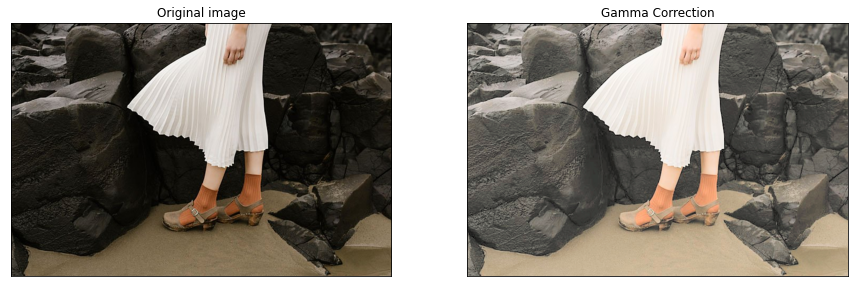

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/highlights_and_shadows.jpg')
assert im is not None
im_=cv.cvtColor(im,cv.COLOR_BGR2Lab)
L, a, b = cv.split(im_)

gamma=0.4
t=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
Ll=cv.LUT(L,t)

hist_im=cv.calcHist([L],[0],None,[256],[0,256])
hist_img2=cv.calcHist([Ll],[0],None,[256],[0,256])

fig,ax=plt.subplots(2,1,figsize=(8,8))
ax[0].plot(hist_im)
ax[0].set_title('Original image')
ax[1].plot(hist_img2)
ax[1].set_title('Gamma Correction')

final_Lab = cv.merge((Ll, a, b))
img2 = cv.cvtColor(final_Lab, cv.COLOR_Lab2BGR)

fig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original image')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Gamma Correction')
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[1].set_xticks([]), ax[1].set_yticks([])


([], [])

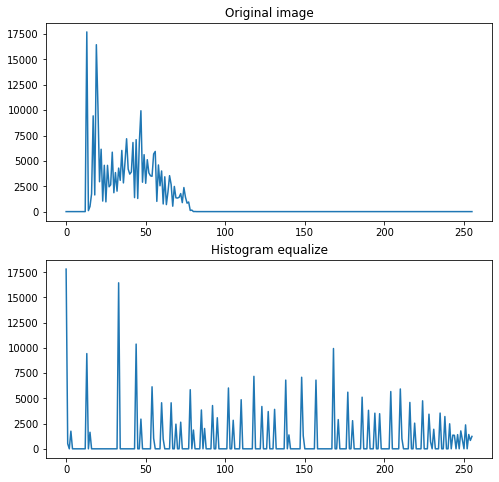

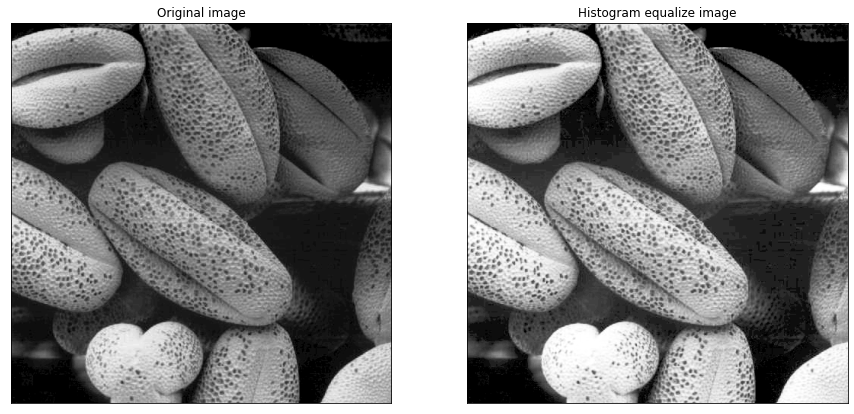

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f=cv.imread(r'./Images/shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None

hist_f=cv.calcHist([f],[0],None,[256],[0,256])
g=cv.equalizeHist(f)
hist_g=cv.calcHist([g],[0],None,[256],[0,256])

fig,ax=plt.subplots(2,1,figsize=(8,8))
ax[0].plot(hist_f)
ax[0].set_title('Original image')
ax[1].plot(hist_g)
ax[1].set_title('Histogram equalize')

fig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(f,"gray")
ax[0].set_title('Original image')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Histogram equalize image')
ax[1].imshow(g,"gray")
ax[1].set_xticks([]), ax[1].set_yticks([])

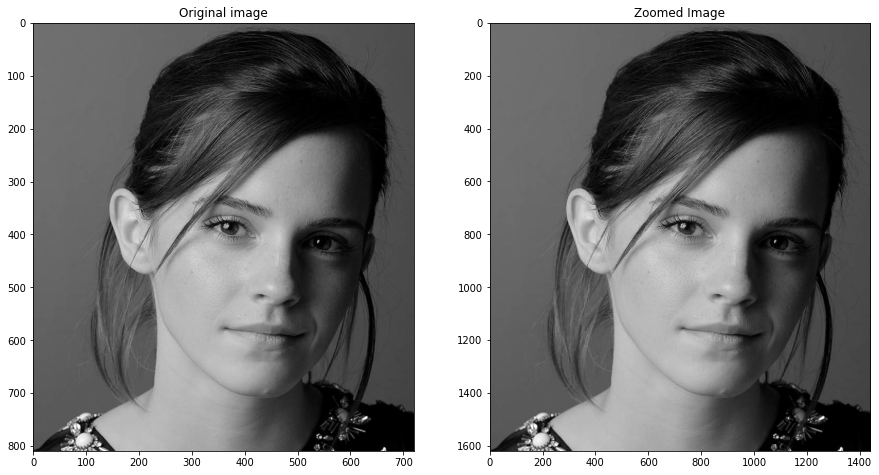

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
scale=2

def nearest_neighbor(im,scale):
    rows=int(scale*im.shape[0])
    cols=int(scale*im.shape[1])

    zoomed=np.zeros((rows,cols),dtype=im.dtype)
    for r in range(rows):
        for c in range(cols):
            #print(r,c)
            rr=round(r/scale)
            cc=round(c/scale)
            if (rr<im.shape[0] and cc<im.shape[1]):
                zoomed[r,c]=im[rr,cc]
            elif(rr<im.shape[0]):
                zoomed[r,c]=im[rr,cc-1]
            elif(cc<im.shape[1]):
                zoomed[r,c]=im[rr-1,cc]
            else:
                zoomed[r,c]=im[rr-1,cc-1]

    return zoomed
zoomed=nearest_neighbor(im,scale)
cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',im)
cv.waitKey(0)

cv.namedWindow('Zoomed',cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed',zoomed)
cv.waitKey(0)
cv.destroyAllWindows()

ig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(im,"gray")
ax[0].set_title('Original image')
#ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Zoomed Image')
ax[1].imshow(zoomed,"gray")
#ax[1].set_xticks([]), ax[1].set_yticks([])

In [27]:
print(zoomed)
print("original")
print(im)

[[111 111 111 ...  77  77  77]
 [111 111 111 ...  77  77  77]
 [111 111 111 ...  77  77  77]
 ...
 [ 66  66  57 ...   0   0   0]
 [ 41  41  32 ...   0   0   0]
 [ 41  41  32 ...   0   0   0]]
original
[[111 111 111 ...  77  77  77]
 [111 111 111 ...  77  77  77]
 [111 111 111 ...  77  77  77]
 ...
 [ 83  79  73 ...   0   0   0]
 [ 66  57  45 ...   0   0   0]
 [ 41  32  20 ...   0   0   0]]


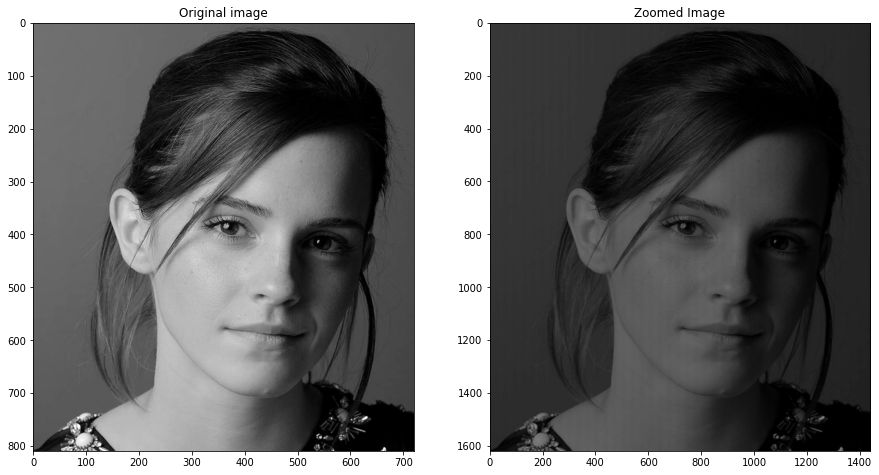

In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
scale=2

def nearest_neighbor(im,scale):
    rows=int(scale*im.shape[0])
    cols=int(scale*im.shape[1])

    zoomed=np.zeros((rows,cols),dtype=im.dtype)
    width=im.shape[0]
    height=im.shape[1]
    for x in range(rows):
        for y in range(cols):
            # Coordinates in old image
            x_ = x/scale
            y_ = y/scale
            
            # Finding neighboring points
            x1 = min(int(np.floor(x_)), width-1)
            y1 = min(int(np.floor(y_)), height-1)
            x2 = min(int(np.ceil(x_)), width-1)
            y2 = min(int(np.ceil(y_)), height-1)
            
            Q11 = im[x1, y1]
            Q12 = im[x2, y1]
            Q21 = im[x1, y2]
            Q22 = im[x2, y2]
            
            # Interpolating P1 and P2
            P1 = (x2-x_)*Q11 + (x_-x1)*Q12
            P2 = (x2-x_)*Q21 + (x_-x1)*Q22
            
            if x1 == x2:
              P1 = Q11
              P2 = Q22
            
            # Interpolating P
            P = (y2-y_)*P1 + (y_-y1)*P2
            
            # Rounding P to an int tuple
            zoomed[x,y]=int(P)
    return zoomed
zoomed=nearest_neighbor(im,scale)
cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',im)
cv.waitKey(0)

cv.namedWindow('Zoomed',cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed',zoomed)
cv.waitKey(0)
cv.destroyAllWindows()

ig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(im,"gray")
ax[0].set_title('Original image')
#ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Zoomed Image')
ax[1].imshow(zoomed,"gray")
#ax[1].set_xticks([]), ax[1].set_yticks([])

In [20]:
np.amax(zoomed)
np.amin(zoomed)

0